In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [14]:
data = pd.read_csv('/content/Cleaned_Data.csv')

In [15]:
df = data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196756 entries, 0 to 196755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  196756 non-null  int64 
 1   ID          196756 non-null  int64 
 2   Name        196756 non-null  object
 3   Sex         196756 non-null  int64 
 4   Age         196756 non-null  int64 
 5   Height      196756 non-null  int64 
 6   Weight      196756 non-null  int64 
 7   NOC         196756 non-null  object
 8   Year        196756 non-null  int64 
 9   Sport       196756 non-null  object
 10  Winner      196756 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 16.5+ MB


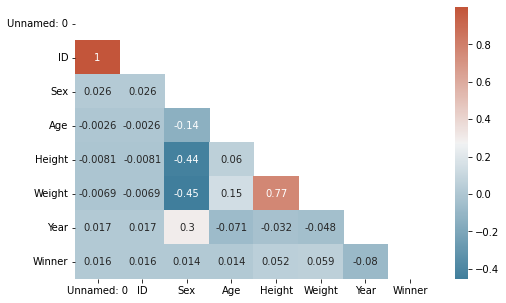

In [17]:
# Correlation between different variables
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 5))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [20]:

X = df.drop(columns=['Winner'])
y = df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape

((137729, 10), (59027, 10))

In [24]:


categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_transformer = Pipeline(steps=[
                                          # ("cat_imputer", SimpleImputer(strategy='constant',
                                          #                               fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])

numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5)) # no standard scaling for numeric data
                                      ])

preprocessor_new = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf

pipeline_rf = Pipeline([("pre_process", preprocessor_new), 
                         ("model", rf)])
pipeline_rf

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['Unnamed: 0', 'ID', 'Sex',
                                                   'Age', 'Height', 'Weight',
                                                   'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'NOC', 'Sport'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
scores = {}

In [27]:
pipeline_rf.fit(X_train, y_train)
y_pred = pipeline_rf.predict(X_test)

class_labels = pipeline_rf.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     48460
           1       0.47      0.28      0.35     10567

    accuracy                           0.81     59027
   macro avg       0.66      0.61      0.62     59027
weighted avg       0.79      0.81      0.80     59027



,0,1
0,45084,3376
1,7586,2981
